In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important;}</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
'''
CNN: xử lí ảnh,
vd bài toán nhận diện chứ só trong bộ minst

'''
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
# mnist is using to set the dataset
from keras.datasets import mnist
# one hot vector
from keras.utils import to_categorical
import numpy as np



'\nCNN: xử lí ảnh,\nvd bài toán nhận diện chứ só trong bộ minst\n\n'

Using TensorFlow backend.


In [15]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape

(60000, 28, 28)

(10000, 28, 28)

3

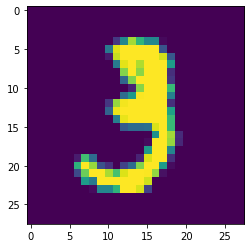

In [16]:
plt.imshow(X_train[10])
y_train[10]

In [17]:
# rechange the dimension
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [18]:
# rechange y to on-hot vector from number
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
# convolution layer 64 * (3*3) ở đây kernel là 3*3, số filter là 64
# padding = same : giữ nguyên 28 28
# maxpooling giảm đi 1 nửa 14 14
# Flatten là dàn ra làm 1 vecto (32*7*7)

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
__________________________________________________

In [20]:
# train
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2441 - accuracy: 0.9456 - val_loss: 0.0677 - val_accuracy: 0.9796
Epoch 2/3
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 3/3
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0551 - accuracy: 0.9835 - val_loss: 0.0586 - val_accuracy: 0.9822


In [22]:
y_hat = model.predict(X_test[0:1])
y_hat

array([[9.3616944e-13, 1.5612813e-11, 2.3618854e-08, 2.4134511e-07,
        5.3820783e-15, 1.5603189e-12, 2.5884575e-20, 9.9999964e-01,
        7.4521653e-11, 1.1331818e-07]], dtype=float32)

In [23]:
y_label = np.argmax(y_hat,axis=1)
y_label

array([7], dtype=int64)